# **Predict the building safety under the earthquake**

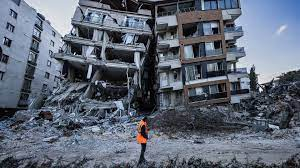

The goal of this project is to predict the structural response of steel frames subjected to seismic loads.  machine learning model to estimate the maximum interstorey displacement given its structural properties, acting gravity, and seismic loads.



In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *


In [4]:
!pip install plotly
import plotly.express as px

# **Load datasets**

In [10]:
train_df=pd.read_csv('/content/train (1).csv')
test_df=pd.read_csv('/content/test.csv')

In [31]:
train_df.head()

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Max drift mm,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,275.0,235.0,16.73,10.330,3877.0,3142.0,1119.0,5.0,4.0,4.0,...,3.0,0.171,6.00,17.28,5.178486,35.052122,10.5,7.0,0.0,1.0
1,235.0,235.0,229.30,182.600,12437.0,11253.0,117.7,3.0,6.0,4.0,...,4.0,0.150,6.33,18.96,4.539964,89.310331,12.0,8.0,0.0,1.0
2,275.0,235.0,276.90,0.000,13347.0,0.0,117.7,6.0,3.0,4.0,...,1.0,0.171,6.00,17.28,1.412026,31.485753,15.0,10.0,0.0,1.0
3,235.0,235.0,10.33,6.062,3142.0,2534.0,920.8,6.0,6.0,3.0,...,1.0,0.283,7.28,19.74,2.490511,27.250323,4.0,10.0,0.0,1.0
4,355.0,355.0,330.90,0.000,14276.0,0.0,920.8,3.0,2.0,4.0,...,4.0,0.171,6.00,17.28,0.313426,5.109617,8.0,4.0,0.0,1.0


# **EDA**

In [11]:
def missing(val):
    text=pd.DataFrame(val.dtypes,columns=['data types'])
    text['missing']=val.isnull().sum()
    text['unique']=val.nunique()
    return text
missing(train_df).style.background_gradient(cmap='rainbow_r')

,data types,missing,unique
Column fy Mpa,float64,0,3
Beam fy Mpa,float64,0,3
Columns 1-3 I mm4*10^6,float64,0,25
Columns 4-6 I mm4*10^6,float64,0,25
Columns 1-3 A mm2,float64,0,25
Columns 4-6 A mm2,float64,0,25
Beam I mm4*10^6,float64,0,20
Spans,float64,0,6
Number of floors,float64,0,6
Floor height m,float64,0,3


In [12]:
train_copy=train_df.copy()

In [13]:
x=train_copy.drop('Max drift mm',axis=1)
y=train_copy['Max drift mm']
t=TSNE(n_components=3, random_state=42)
tsne=t.fit_transform(x)

In [14]:
data_tsne=pd.concat([pd.DataFrame(tsne),y],axis=1)
data_tsne.head()

,0,1,2,Max drift mm
0,12.024187,-9.032092,-3.698323,35.052122
1,12.442851,1.840703,-6.773614,89.310331
2,13.657015,-2.219182,-7.710515,31.485753
3,-3.865681,-6.071055,-7.947845,27.250323
4,-11.630366,-6.700796,1.835304,5.109617


In [15]:
hi=px.scatter_3d(data_tsne,x=0,y=1,z=2,color=data_tsne['Max drift mm'],
                 title="T-SNE_Scatter_3D Plotly",
                 template="plotly_dark")
hi.update_layout()
hi.show()

In [16]:
px.scatter_ternary(train_df,a='Max drift mm',c='Final Live Load',b='Final Dead Load',template="plotly_dark",
                   title="Dead load & Live load to Area")

<Axes: >

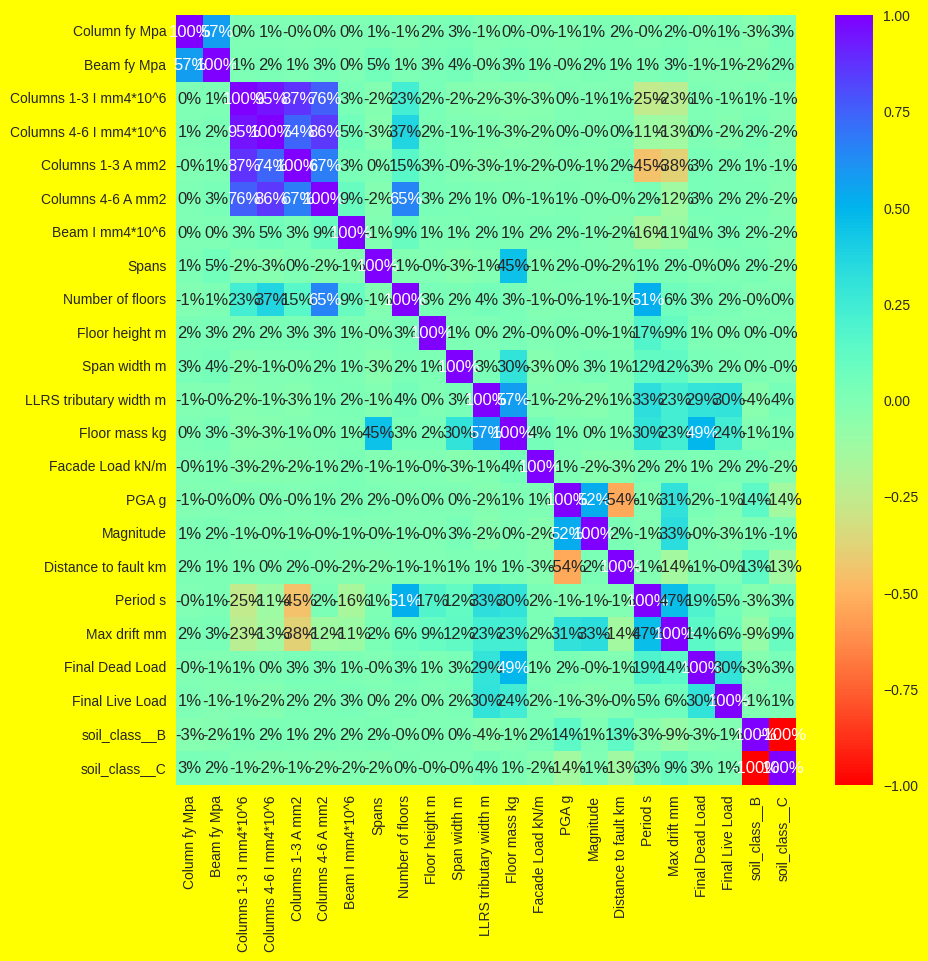

In [17]:
plt.figure(figsize=(10,10),facecolor="yellow")
sns.heatmap(train_df.corr(),annot=True,fmt=".0%",cmap='rainbow_r')

# **Auto ML** setup datas

In [18]:
setup(train_df,target='Max drift mm',normalize_method="robust",remove_outliers=True)

,Description,Value
0,Session id,7476
1,Target,Max drift mm
2,Target type,Regression
3,Original data shape,"(2922, 23)"
4,Transformed data shape,"(2819, 23)"
5,Transformed train set shape,"(1942, 23)"
6,Transformed test set shape,"(877, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


# list of Models

In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


# **Compare Model**

In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.0075,58.6470,7.3751,0.8900,0.2322,0.2486,0.9820
lightgbm,Light Gradient Boosting Machine,4.0547,70.1942,8.0438,0.8699,0.2434,0.2340,0.3940
xgboost,Extreme Gradient Boosting,4.0149,70.6219,8.0025,0.8697,0.2366,0.2334,0.3970
rf,Random Forest Regressor,4.1088,76.3973,8.4043,0.8580,0.2138,0.2094,1.3950
gbr,Gradient Boosting Regressor,5.4603,97.5279,9.5700,0.8162,0.3634,0.4305,0.5690
dt,Decision Tree Regressor,5.8397,168.7692,12.5961,0.6550,0.3012,0.2723,0.1170
ada,AdaBoost Regressor,13.2140,242.0097,15.5382,0.4940,0.9055,2.3072,0.5810
lr,Linear Regression,10.8955,278.0897,16.4780,0.4539,0.7137,1.1064,1.3540
ridge,Ridge Regression,10.9077,278.2703,16.4822,0.4537,0.7119,1.1065,0.0520
br,Bayesian Ridge,10.9939,280.2243,16.5400,0.4499,0.7140,1.1184,0.0620


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=7476)

# **CREATE Model**

In [21]:
ML=create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.8154,181.4108,13.4689,0.7805,0.2160,0.1988
1,3.3880,26.4278,5.1408,0.9178,0.2179,0.2059
2,3.8305,39.3547,6.2733,0.8930,0.2766,0.2217
3,5.0273,76.4957,8.7462,0.8477,0.2543,0.2355
4,4.0346,84.7174,9.2042,0.8536,0.2331,0.2288
5,3.9970,68.6859,8.2877,0.8756,0.2463,0.2940
6,3.5354,31.3942,5.6030,0.9340,0.2752,0.2388
7,3.4542,41.4741,6.4400,0.9070,0.2137,0.2241
8,4.4994,96.3786,9.8173,0.8148,0.2462,0.2395


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **PipeLine**

In [22]:
print(finalize_model(ML))

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Column fy Mpa', 'Beam fy Mpa',
                                             'Columns 1-3 I mm4*10^6',
                                             'Columns 4-6 I mm4*10^6',
                                             'Columns 1-3 A mm2',
                                             'Columns 4-6 A mm2',
                                             'Beam I mm4*10^6', 'Spans',
                                             'Number of floors',
                                             'Floor height m', 'Span width m',
                                             'LLRS tributary width m',
                                             'Floor mass kg',
                                             'Facade Load kN/m', 'PGA g',
                                             'Magnitude',...
                                    transformer=SimpleImputer())),
         

In [23]:
finalize_model(ML)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Column fy Mpa', 'Beam fy Mpa',
                                             'Columns 1-3 I mm4*10^6',
                                             'Columns 4-6 I mm4*10^6',
                                             'Columns 1-3 A mm2',
                                             'Columns 4-6 A mm2',
                                             'Beam I mm4*10^6', 'Spans',
                                             'Number of floors',
                                             'Floor height m', 'Span width m',
                                             'LLRS tributary width m',
                                             'Floor mass kg',
                                             'Facade Load kN/m', 'PGA g',
                                             'Magnitude',...
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('remove_outliers',
                 TransformerWrapper(transformer=RemoveOutliers(random_state=7476))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator', LGBMRegressor(random_state=7476))])

# **MODEL PLOTS**

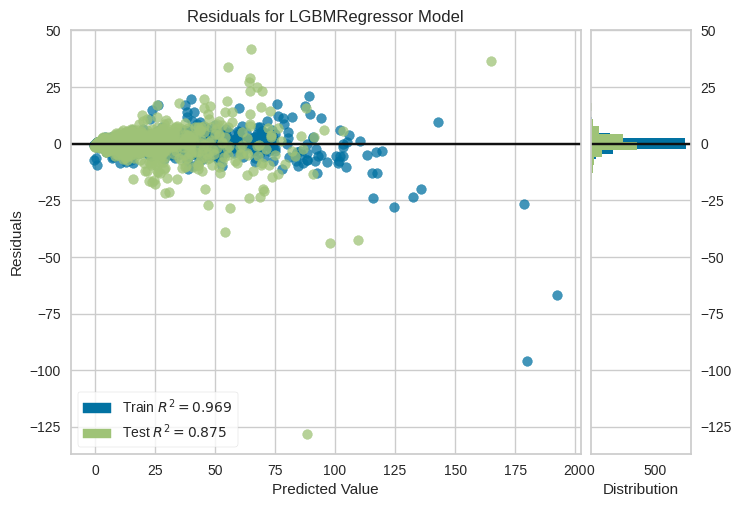

In [24]:
plot_model(ML)

# **Predictions**

In [25]:
predictions=ML.predict(test_df)

In [26]:
Done=pd.DataFrame({"Index":test_df.index,"Max drift mm":predictions})

In [27]:
Done.head()

,Index,Max drift mm
0,0,4.012464
1,1,1.102275
2,2,36.646450
3,3,19.047967
4,4,1.299278


# **Model-MAE,MSE,RMSE,R2,RMSLE,MAPE**

In [28]:
predict_model(ML)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.6340,58.1443,7.6252,0.8751,0.2395,0.2464


,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C,Max drift mm,prediction_label
2138,275.0,275.0,54.099998,0.000000,6434.0,0.0,920.799988,6.0,3.0,4.0,...,0.150,6.20,13.91,1.531801,10.5,17.5,1.0,0.0,19.075117,17.694759
2193,275.0,275.0,1412.000000,1119.000000,22646.0,21176.0,83.559998,5.0,4.0,3.0,...,0.123,6.19,12.90,0.864028,6.0,4.0,0.0,1.0,7.290963,7.407597
1223,275.0,275.0,2153.000000,1752.000000,26048.0,24164.0,1412.000000,6.0,4.0,4.0,...,0.150,6.20,13.91,0.315476,21.0,14.0,1.0,0.0,2.770186,2.851709
725,355.0,235.0,104.500000,77.629997,8682.0,7684.0,8.693000,6.0,4.0,3.5,...,0.283,7.28,19.74,2.425720,3.0,4.5,0.0,1.0,26.117275,33.189735
700,355.0,235.0,1119.000000,0.000000,21176.0,0.0,920.799988,3.0,2.0,4.0,...,0.283,7.28,19.74,0.318888,12.5,2.5,0.0,1.0,16.504379,15.573961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,235.0,235.0,6.062000,0.000000,2534.0,0.0,231.300003,4.0,2.0,3.5,...,0.123,6.19,12.90,1.524910,7.5,7.5,0.0,1.0,22.154741,20.614784
2487,275.0,235.0,330.899994,0.000000,14276.0,0.0,27.719999,4.0,1.0,3.0,...,0.140,5.90,25.50,0.194978,4.5,4.5,0.0,1.0,4.096360,2.634244
2605,355.0,235.0,1119.000000,0.000000,21176.0,0.0,27.719999,5.0,2.0,4.0,...,0.100,6.10,32.84,0.294968,8.0,8.0,1.0,0.0,3.549761,4.158286
1469,355.0,355.0,869.700012,0.000000,19754.0,0.0,5.412000,6.0,2.0,3.0,...,0.123,6.19,12.90,0.299317,6.0,4.0,0.0,1.0,1.524333,3.208624


# **Submission**

In [29]:
Done.to_csv("submission.csv",index=False)

# **thank you**